<a href="https://colab.research.google.com/github/AbhijeetKD20/Guvi-Assignments/blob/main/E_commerce_customer_segmentation_Project(Guvi).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Problem Statement**
As an e-commerce platform, it is very important to profile your customers, dividing your clientele base into groups based on their needs and expectations. Grouping will help us come up with dedicated marketing strategies and will aid us in recommending products to different user bases. In this project, we are interested in analyzing the content of an E-commerce database that lists purchases made by ∼4000 customers over a period of one year (1/12/2010 to 9/12/2011). Based on this analysis, we would like to develop models to group the 4000 customers into different buckets. Such a model must take into account the similarity between the products purchased between the users (i.e. a user might purchase 2 different products which are very similar to each other), the spending patterns of a user, their meta information, etc. 


## **Minimum Requirements**
The end objective of the participant is to come up with customer segmentations that take into account all the information that is presented in the dataset. The participant is expected to use NLP techniques to find similarity between the products. 


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# import os
# #C:\Users\Abhijeet\Desktop\Guvi Assignments
# path = os.path.join("c:" +os.sep, "Users", "Abhijeet", "Desktop", "Guvi Assignments", "E-comm.data.csv")
dataset = pd.read_csv("E-comm.data.csv", encoding = 'unicode_escape')

In [ ]:
dataset.shape

(541909, 8)

## **Checking for null values**

In [ ]:
dataset.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

There are 1454 null values in the description section. We can't do any imputation on the nul values of Description and CustomerID cols. So it is better to simply drop the null values in it

In [ ]:
dataset  = dataset.dropna()
dataset.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [ ]:
#Checking for duplicates
dataset.duplicated().sum()

5225

In [ ]:
#Dropping the duplicates
dataset = dataset.drop_duplicates()
dataset.duplicated().sum()

0

InvoiceDate

In [ ]:
dataset["InvoiceDate"].value_counts()

11/14/2011 15:27    543
11/28/2011 15:54    534
12/5/2011 17:17     530
11/23/2011 13:39    444
10/31/2011 14:09    436
                   ... 
8/11/2011 10:19       1
5/11/2011 12:45       1
7/12/2011 11:08       1
7/12/2011 11:07       1
9/6/2011 15:53        1
Name: InvoiceDate, Length: 20460, dtype: int64

In [ ]:
dataset["InvoiceDate"].unique()

array(['12/1/2010 8:26', '12/1/2010 8:28', '12/1/2010 8:34', ...,
       '12/9/2011 12:31', '12/9/2011 12:49', '12/9/2011 12:50'],
      dtype=object)

We need to change the dtype of InvoiceDate to datetime rom int. Also extract Invoice day and Invoice Time

In [ ]:
#New cols Invoice day and Invoice Time:
dataset["Invoice_day"] = pd.to_datetime(dataset["InvoiceDate"]).dt.date
dataset["Invoice_time"] = pd.to_datetime(dataset["InvoiceDate"]).dt.time

In [ ]:
dataset.sample(3)

InvoiceNo StockCode                     Description  Quantity  \
150490    549440     22992          REVOLVER WOODEN RULER         12   
350543    567653     23198  PANTRY MAGNETIC  SHOPPING LIST        12   
259709    559704     22891            TEA FOR ONE POLKADOT         3   

            InvoiceDate  UnitPrice  CustomerID         Country Invoice_day  \
150490   4/8/2011 12:42       1.95     17162.0  United Kingdom  2011-04-08   
350543  9/21/2011 14:35       1.45     12550.0           Spain  2011-09-21   
259709   7/12/2011 9:54       4.25     12669.0          France  2011-07-12   

       Invoice_time  
150490     12:42:00  
350543     14:35:00  
259709     09:54:00

Dropping the InvoiceDate col

In [ ]:
dataset.drop(["InvoiceDate"], axis = 1, inplace = True)

CustomerID

In [ ]:
dataset["CustomerID"].value_counts()

17841.0    7812
14911.0    5898
14096.0    5128
12748.0    4459
14606.0    2759
           ... 
18068.0       1
13256.0       1
15590.0       1
16138.0       1
15389.0       1
Name: CustomerID, Length: 4372, dtype: int64

In [ ]:
#Converting the dtype from float to int
dataset["CustomerID"] = dataset["CustomerID"].astype(int)

Invoice No

In [ ]:
#invoice no is of no use. So we drop it
dataset.drop("InvoiceNo", axis = 1, inplace = True)

### **Pre-processing text data for NLP**

Taking only the dataset["Description"] and making a subset of desc_df

In [ ]:
desc_df = dataset.filter(["Description", "CustomerID"], axis = 1)
desc_df.columns

Index(['Description', 'CustomerID'], dtype='object')

Dropping duplicates

In [ ]:
desc_df = desc_df.drop_duplicates()
desc_df.duplicated().sum()

0

Removing punctutions and numbers

In [ ]:
#Replacing punctuations with space
desc_df["Desc_processed"] = desc_df["Description"].str.replace("[^a-zA-Z]", " ")

#So str.replace decides that in my dataset "review" col whenever my letter in not (^ means not) between 
#a-z, A-z, 0-9, it will replace it with a space.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  


In [ ]:
#Re ordering columns
desc_df["Desc_processed"]

0          WHITE HANGING HEART T LIGHT HOLDER
1                         WHITE METAL LANTERN
2              CREAM CUPID HEARTS COAT HANGER
3         KNITTED UNION FLAG HOT WATER BOTTLE
4              RED WOOLLY HOTTIE WHITE HEART 
                         ...                 
541888         ZINC T LIGHT HOLDER STAR LARGE
541894               CIRCUS PARADE LUNCH BOX 
541904            PACK OF    SPACEBOY NAPKINS
541907        CHILDRENS CUTLERY CIRCUS PARADE
541908          BAKING SET   PIECE RETROSPOT 
Name: Desc_processed, Length: 269157, dtype: object

In [ ]:
desc_df.columns

Index(['Description', 'CustomerID', 'Desc_processed'], dtype='object')

In [ ]:
desc_df.head()

Description  CustomerID  \
0   WHITE HANGING HEART T-LIGHT HOLDER       17850   
1                  WHITE METAL LANTERN       17850   
2       CREAM CUPID HEARTS COAT HANGER       17850   
3  KNITTED UNION FLAG HOT WATER BOTTLE       17850   
4       RED WOOLLY HOTTIE WHITE HEART.       17850   

                        Desc_processed  
0   WHITE HANGING HEART T LIGHT HOLDER  
1                  WHITE METAL LANTERN  
2       CREAM CUPID HEARTS COAT HANGER  
3  KNITTED UNION FLAG HOT WATER BOTTLE  
4       RED WOOLLY HOTTIE WHITE HEART

## **LowerCase character**

In [ ]:
#make entire text lowercase
desc_df["Desc_lower"] = [word.lower() for word in desc_df["Desc_processed"]]
desc_df[["Desc_processed", "Desc_lower"]].sample(10)

Desc_processed                        Desc_lower
127703                 BLUE POLKADOT CUP                 blue polkadot cup
354669     CHOCOLATE THIS WAY METAL SIGN     chocolate this way metal sign
522209        COOK WITH WINE METAL SIGN         cook with wine metal sign 
442953                VINTAGE SNAP CARDS                vintage snap cards
387166       BOX OF   MINI    S CRACKERS       box of   mini    s crackers
265077        SLATE TILE NATURAL HANGING        slate tile natural hanging
341588  PINK GREEN FLOWER DESIGN BIG MUG  pink green flower design big mug
424454                 Next Day Carriage                 next day carriage
344860     SILVER STARS TABLE DECORATION     silver stars table decoration
417789      FRENCH STYLE STORAGE JAR JAM      french style storage jar jam

In [ ]:
!pip install nltk

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import nltk
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

### **Removing Stopwords**

In [ ]:
from nltk.corpus import stopwords
from nltk import word_tokenize

stop_words = stopwords.words("english")

add_words = ["set", "design", "heart", "red", "blue", "white", "black", "dark", "pack", "green", "yellow", "orange"]

stop_words.extend(add_words)

In [ ]:
def remove_stopwords(rev):
    review_tokenized = word_tokenize(rev)
    rev_new = " ".join([i for i in review_tokenized if i not in stop_words])
    return rev_new

desc_df["Desc_stop"] = [remove_stopwords(r) for r in desc_df["Desc_lower"]]

## **Word Tokenisation**

In [ ]:
for sentence in desc_df["Desc_stop"]: # looping through every sentence
    words = nltk.word_tokenize(sentence) # we are extracting the important words in the sentence
    print(words)
    print()

Streaming output truncated to the last 5000 lines.
['harmonica', 'box']

['vintage', 'heads', 'tails', 'card', 'game']

['doily', 'thank', 'card']

['robot', 'birthday', 'card']

['skulls', 'greeting', 'card']

['elephant', 'birthday', 'card']

['sweetheart', 'ceramic', 'trinket', 'box']

['charlotte', 'bag', 'vintage', 'alphabet']

['classic', 'chrome', 'bicycle', 'bell']

['ice', 'cream', 'bubbles']

['strawberry', 'charlotte', 'bag']

['retrospot', 'charlotte', 'bag']

['jam', 'making', 'jars']

['wrap', 'keep', 'calm', 'birthday']

['wrap', 'christmas']

['cut', 'glass', 'light', 'holder', 'octagon']

['antique', 'glass', 'candlestick']

['fluted', 'antique', 'candle', 'holder']

['silver', 'bells', 'table', 'decoration']

['large', 'babushka', 'notebook']

['small', 'babushka', 'notebook']

['large', 'purple', 'babushka', 'notebook']

['small', 'purple', 'babushka', 'notebook']

['large', 'babushka', 'notebook']

['small', 'babushka', 'notebook']

['babushka', 'nesting', 'boxes']


## **Lemmatization**

In [ ]:
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.corpus import wordnet
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [ ]:
#function to convert nltk tag to wordnet tag
lemmatizer = WordNetLemmatizer()
nltk.download("omw-1.4")

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

### **POS**

In [ ]:
#Finds the part of speech tag
#Convert the detailed POS tag into a shallow information
def nltk_tag_to_wordnet_tag(nltk_tag):
  if nltk_tag.startswith("J"):
    return wordnet.ADJ
  elif nltk_tag.startswith("V"):
    return wordnet.VERB
  elif nltk_tag.startswith("N"):
    return wordnet.NOUN
  elif nltk_tag.startswith("R"):
    return wordnet.ADV
  else:
    return None 

In [ ]:
# lemmatize sentence using pos tag
nltk.download("averaged_perceptron_tagger")
def lemmatize_sentence(sentence):
  # word tokenize -> pos tag (detailed) -> wordnet tag (shallow pos) -> lemmatizer -> root word
    #tokenize the sentence and find the POS tag for each token
    nltk_tagged = nltk.pos_tag(nltk.word_tokenize(sentence))  
    #tuple of (token, wordnet_tag)
    wordnet_tagged = map(lambda x: (x[0], nltk_tag_to_wordnet_tag(x[1])), nltk_tagged)
    lemmatized_sentence = []
    for word, tag in wordnet_tagged:
        if tag is None:
            #if there is no available tag, append the token as is
            lemmatized_sentence.append(word)
        else:        
            #else use the tag to lemmatize the token
            lemmatized_sentence.append(lemmatizer.lemmatize(word, tag))
    return " ".join(lemmatized_sentence)

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [ ]:
desc_df["Desc_lemm"] = desc_df["Desc_stop"].apply(lambda x: lemmatize_sentence(x))

**Note:**
Here we are not doing any shortwords removal as these text data contain list of things and not speeches

## **EDA**

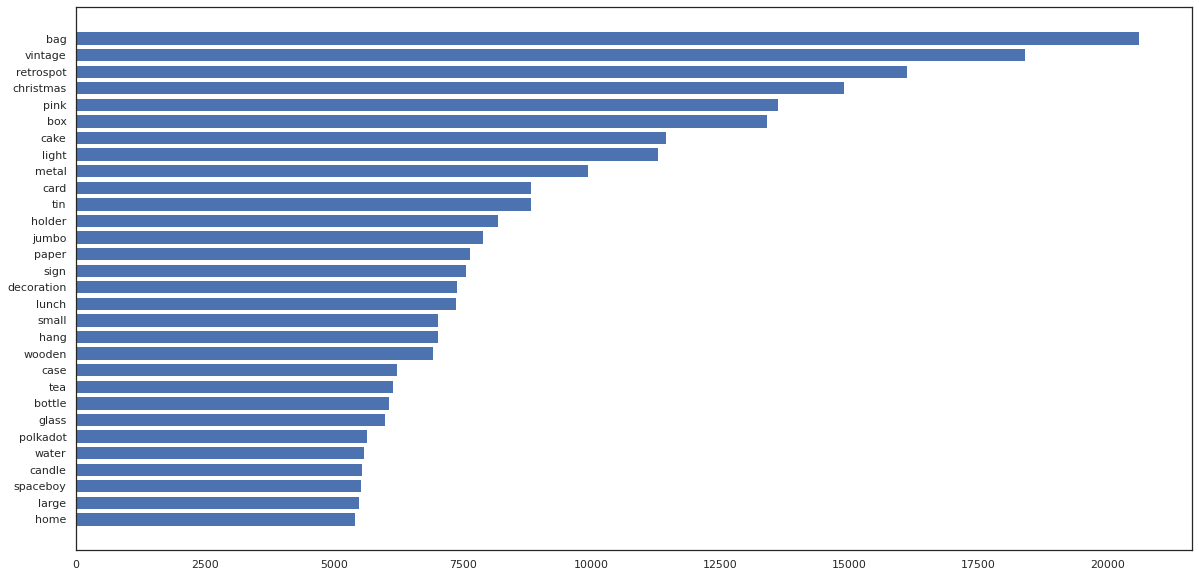

In [ ]:
#Plotting the most frequent words from positive rviews using bar chart

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style = "white")
from nltk import FreqDist #function to find the frequent words in the data


#Extracts words into list and count frequency 
all_words = " ".join([text for text in desc_df["Desc_lemm"]])
all_words = all_words.split()
words_df = FreqDist(all_words)


#Extracting words and frequency from words_df object
words_df = pd.DataFrame({"word":list(words_df.keys()), "count":list(words_df.values())})
words_df

#Subsets top 30 words by frequency
words_df = words_df.nlargest(columns = "count", n= 30)

words_df.sort_values("count", inplace = True)
plt.figure(figsize  = (20, 10))
ax = plt.barh(words_df["word"], width = words_df["count"])
plt.show()

In [ ]:
print(words_df["word"])

49           home
127         large
87       spaceboy
196        candle
14          water
130      polkadot
21          glass
15         bottle
82            tea
141          case
121        wooden
0            hang
187         small
88          lunch
264    decoration
163          sign
103         paper
129         jumbo
2          holder
230           tin
79           card
3           metal
1           light
140          cake
20            box
67           pink
106     christmas
81      retrospot
45        vintage
92            bag
Name: word, dtype: object


In [ ]:
!pip install wordcloud

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


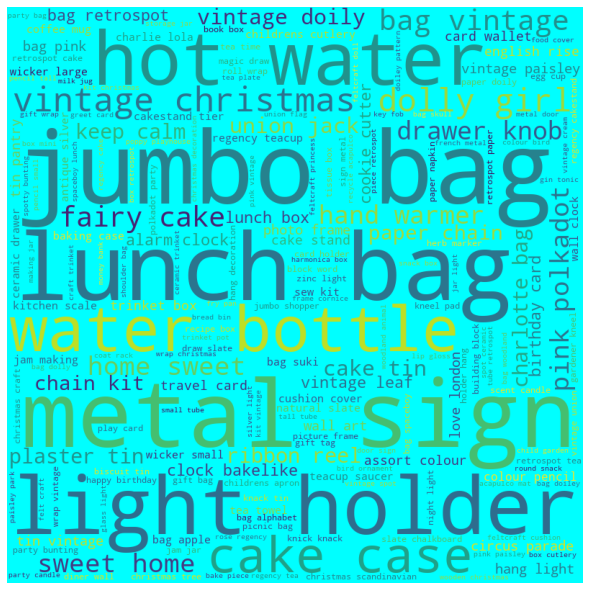

In [ ]:
#Building a Word Cloud
from wordcloud import WordCloud
all_words = " ".join([text for text in desc_df["Desc_lemm"]])


wordcloud = WordCloud(width = 800, height = 800,
                     background_color = "cyan",
                     min_font_size = 10).generate(all_words)

#plot the WordCloud image
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

## **Bags of Words model**

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

#Creating matrix of top 2500 tokens
tfidf = TfidfVectorizer(max_features = 2500)
X = tfidf.fit_transform(desc_df["Desc_lemm"])
features = tfidf.get_feature_names()
print(len(features))

1730


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


## **Clustering part using K-Means cluster**

## **Plotting the Elbow Plot**

In [ ]:
#plot-1

# from sklearn.cluster import KMeans
# wcss = []
# for i in range(1,50,5):
#     kmeans = KMeans(n_clusters = i, init = "k-means++", max_iter = 300, n_init = 10, random_state = 0)
#     kmeans.fit(X)
#     wcss.append(kmeans.inertia_)
    
# plt.figure(figsize = (15,8), facecolor = None)
# plt.plot(range(1,50, 5), wcss)
# plt.title("The Elbow method")
# plt.ylabel("WCSS")
# plt.savefig("elbow.png")

In [ ]:
#plot-2

# wcss = []
# for i in range(1,50,2):
#     kmeans = KMeans(n_clusters = i, init = "k-means++", max_iter = 100, n_init = 10, random_state = 0)
#     kmeans.fit(X)
#     wcss.append(kmeans.inertia_)
    
# plt.figure(figsize = (15,8), facecolor = None)
# plt.plot(range(1,50, 2), wcss)
# plt.title("The Elbow method")
# plt.ylabel("WCSS")
# plt.savefig("elbow.png")

 **We find that the best value for k = 46 from various elbow plots executed.**

In [ ]:
#After finding the best value of k, fitting it to our model
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters = 46)
kmeans.fit(X)
cluster = kmeans.labels_

In [ ]:
#Checking for different clusters
[c for c in cluster][:20]

[18, 6, 39, 0, 1, 7, 18, 35, 35, 43, 1, 31, 25, 12, 43, 7, 7, 34, 1, 7]

In [ ]:
desc_df["Cluster_No(46)"] = cluster

### **Dropping rest of the columns**

In [ ]:
desc_df.drop(["Description", "Desc_processed", "Desc_lower", "Desc_stop"], axis = 1, inplace = True)

In [ ]:
desc_df.drop([ "CustomerID"], axis = 1, inplace = True )

In [ ]:
desc_df.head()

Desc_lemm  Cluster_No(46)
0                 hang light holder              18
1                     metal lantern               6
2     cream cupid heart coat hanger              39
3  knit union flag hot water bottle               0
4                     woolly hottie               1

This is our final output from NLP and first clustering.

**Cell Aggregation:**
Now we create a new DataFrame where each row belong to one CustomerID and the clusters

In [ ]:
CustomerID = list(dataset["CustomerID"].unique())

In [ ]:
cluster_dummy = pd.get_dummies(desc_df["Cluster_No(46)"])
# df_merge.drop(["Country", "Cluster_No(46)"], axis = 1, inplace = True)
desc_df = pd.concat([desc_df, cluster_dummy], axis = "columns")

In [ ]:
desc_df

Desc_lemm  Cluster_No(46)  0  1  2  3  4  5  6  \
0                      hang light holder              18  0  0  0  0  0  0  0   
1                          metal lantern               6  0  0  0  0  0  0  1   
2          cream cupid heart coat hanger              39  0  0  0  0  0  0  0   
3       knit union flag hot water bottle               0  1  0  0  0  0  0  0   
4                          woolly hottie               1  0  1  0  0  0  0  0   
...                                  ...             ... .. .. .. .. .. .. ..   
541888      zinc light holder star large              18  0  0  0  0  0  0  0   
541894           circus parade lunch box              15  0  0  0  0  0  0  0   
541904                   spaceboy napkin               8  0  0  0  0  0  0  0   
541907   childrens cutlery circus parade              15  0  0  0  0  0  0  0   
541908              bake piece retrospot               9  0  0  0  0  0  0  0   

        7  ...  36  37  38  39  40  41  42  43  44  45  
0       0  ...   0   0   0   0   0   0   0   0   0   0  
1       0  ...   0   0   0   0   0   0   0   0   0   0  
2       0  ...   0   0   0   1   0   0   0   0   0   0  
3       0  ...   0   0   0   0   0   0   0   0   0   0  
4       0  ...   0   0   0   0   0   0   0   0   0   0  
...    ..  ...  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  
541888  0  ...   0   0   0   0   0   0   0   0   0   0  
541894  0  ...   0   0   0   0   0   0   0   0   0   0  
541904  0  ...   0   0   0   0   0   0   0   0   0   0  
541907  0  ...   0   0   0   0   0   0   0   0   0   0  
541908  0  ...   0   0   0   0   0   0   0   0   0   0  

[269157 rows x 48 columns]

## **Merging two datasets - dataset and desc_df**

In [ ]:
df_merge = pd.concat([dataset, desc_df], axis = 1, join = "inner")

In [ ]:
df_merge.columns


Index([     'StockCode',    'Description',       'Quantity',      'UnitPrice',
           'CustomerID',        'Country',    'Invoice_day',   'Invoice_time',
            'Desc_lemm', 'Cluster_No(46)',                0,                1,
                      2,                3,                4,                5,
                      6,                7,                8,                9,
                     10,               11,               12,               13,
                     14,               15,               16,               17,
                     18,               19,               20,               21,
                     22,               23,               24,               25,
                     26,               27,               28,               29,
                     30,               31,               32,               33,
                     34,               35,               36,               37,
                     38,               39,          

### **We remove the Desc_lemm col too as it is no longer needed**

In [ ]:
df_merge.drop(["Description","Desc_lemm", "Invoice_time"], axis = 1, inplace = True)

In [ ]:
df_merge.sample(10)

StockCode  Quantity  UnitPrice  CustomerID         Country Invoice_day  \
386132     23207         2       1.65       16595  United Kingdom  2011-10-09   
214461     21844        24       2.95       15301  United Kingdom  2011-06-05   
458017     22768         1       9.95       17295  United Kingdom  2011-11-11   
519232     22720         1       4.95       17566  United Kingdom  2011-12-01   
137101     21397        48       0.39       17719  United Kingdom  2011-03-29   
493183     35967        12       0.38       13576  United Kingdom  2011-11-23   
293410     22691         4       7.95       15152  United Kingdom  2011-08-08   
264050     21932        10       1.65       17612  United Kingdom  2011-07-14   
514193     23354        12       0.83       15680  United Kingdom  2011-11-30   
346412    84989A         3       0.55       16033  United Kingdom  2011-09-18   

        Cluster_No(46)  0  1  2  ...  36  37  38  39  40  41  42  43  44  45  
386132              21  0  0  0  ...   0   0   0   0   0   0   0   0   0   0  
214461              33  0  0  0  ...   0   0   0   0   0   0   0   0   0   0  
458017              40  0  0  0  ...   0   0   0   0   1   0   0   0   0   0  
519232              23  0  0  0  ...   0   0   0   0   0   0   0   0   0   0  
137101              32  0  0  0  ...   0   0   0   0   0   0   0   0   0   0  
493183              18  0  0  0  ...   0   0   0   0   0   0   0   0   0   0  
293410               1  0  1  0  ...   0   0   0   0   0   0   0   0   0   0  
264050               1  0  1  0  ...   0   0   0   0   0   0   0   0   0   0  
514193              10  0  0  0  ...   0   0   0   0   0   0   0   0   0   0  
346412               4  0  0  0  ...   0   0   0   0   0   0   0   0   0   0  

[10 rows x 53 columns]

In [ ]:
#Adding a new col
df_merge["Total_price"] = df_merge["Quantity"]*df_merge["UnitPrice"]

In [ ]:
df_merge.groupby("CustomerID")["Country"].unique()

CustomerID
12346    [United Kingdom]
12347           [Iceland]
12348           [Finland]
12349             [Italy]
12350            [Norway]
               ...       
18280    [United Kingdom]
18281    [United Kingdom]
18282    [United Kingdom]
18283    [United Kingdom]
18287    [United Kingdom]
Name: Country, Length: 4372, dtype: object

Since stockcode alligns with description it may not take make any difference by deleting it.
Quantity and unit price is deleted as its product total_price remains as a new column.
InvoiceDate will be deleted for computational simplicity.

### **Country**

In [ ]:
#Country groupby
country_df = df_merge.groupby("CustomerID").agg({"Country":pd.Series.mode})
country_df

Country
CustomerID                
12346       United Kingdom
12347              Iceland
12348              Finland
12349                Italy
12350               Norway
...                    ...
18280       United Kingdom
18281       United Kingdom
18282       United Kingdom
18283       United Kingdom
18287       United Kingdom

[4372 rows x 1 columns]

In [ ]:
country_df.reset_index()

CustomerID         Country
0          12346  United Kingdom
1          12347         Iceland
2          12348         Finland
3          12349           Italy
4          12350          Norway
...          ...             ...
4367       18280  United Kingdom
4368       18281  United Kingdom
4369       18282  United Kingdom
4370       18283  United Kingdom
4371       18287  United Kingdom

[4372 rows x 2 columns]

In [ ]:
country_dummy = pd.get_dummies(country_df["Country"])
cluster_value_dummy = pd.get_dummies(df_merge["Cluster_No(46)"])
df_merge.drop(["Country", "Cluster_No(46)"], axis = 1, inplace = True)
frame = [df_merge, cluster_value_dummy]
df_merge = pd.concat(frame, axis = "columns")

In [ ]:
df_merge.head()

StockCode  Quantity  UnitPrice  CustomerID Invoice_day  0  1  2  3  4  ...  \
0    85123A         6       2.55       17850  2010-12-01  0  0  0  0  0  ...   
1     71053         6       3.39       17850  2010-12-01  0  0  0  0  0  ...   
2    84406B         8       2.75       17850  2010-12-01  0  0  0  0  0  ...   
3    84029G         6       3.39       17850  2010-12-01  1  0  0  0  0  ...   
4    84029E         6       3.39       17850  2010-12-01  0  1  0  0  0  ...   

   36  37  38  39  40  41  42  43  44  45  
0   0   0   0   0   0   0   0   0   0   0  
1   0   0   0   0   0   0   0   0   0   0  
2   0   0   0   1   0   0   0   0   0   0  
3   0   0   0   0   0   0   0   0   0   0  
4   0   0   0   0   0   0   0   0   0   0  

[5 rows x 98 columns]

In [ ]:
df_merge["StockCode"].value_counts()

22423     887
85123A    865
47566     708
84879     679
23203     670
         ... 
90027A      1
84743C      1
84802A      1
44242A      1
23843       1
Name: StockCode, Length: 3684, dtype: int64

In [ ]:
# now to aggregate it by cluster values and country we use sum() aggregate
# for total_price we use average
df_3= df_merge[["CustomerID", "Total_price"]]
df_merge.drop(["StockCode", "Quantity","UnitPrice", "Total_price"], axis = 1, inplace = True)

In [ ]:
df_3.sample(3)

CustomerID  Total_price
221691       13969         4.50
17181        15750        17.00
17464        16893         2.95

In [ ]:
df_2 = df_merge.groupby("CustomerID").agg("sum")
df_3 = df_3.groupby("CustomerID").agg("mean")

In [ ]:
df_2.sample(3)

0     1    2    3    4    5    6    7    8    9   ...   36   37  \
CustomerID                                                     ...             
14844       3.0  21.0  1.0  0.0  6.0  1.0  8.0  2.0  0.0  1.0  ...  1.0  0.0   
17542       0.0   7.0  1.0  1.0  4.0  0.0  0.0  2.0  0.0  0.0  ...  0.0  0.0   
12489       0.0   6.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  ...  1.0  0.0   

             38   39   40   41   42   43   44   45  
CustomerID                                          
14844       0.0  0.0  0.0  0.0  2.0  0.0  0.0  1.0  
17542       1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
12489       0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  

[3 rows x 92 columns]

In [ ]:
df_3.sample(3)

Total_price
CustomerID             
12546         16.249153
18196          4.984580
17186         72.000000

In [ ]:
df_2 = df_2.reset_index()
df_3 = df_3.reset_index()

In [ ]:
country_dummy.sample(10)

Australia  Austria  Bahrain  Belgium  Brazil  Canada  \
CustomerID                                                         
12951               0        0        0        0       0       0   
15582               0        0        0        0       0       0   
12795               0        0        0        0       0       0   
14729               0        0        0        0       0       0   
17843               0        0        0        0       0       0   
17534               0        0        0        0       0       0   
13692               0        0        0        0       0       0   
13591               0        0        0        0       0       0   
17934               0        0        0        0       0       0   
17972               0        0        0        0       0       0   

            Channel Islands  Cyprus  Czech Republic  Denmark  ...  RSA  \
CustomerID                                                    ...        
12951                     0       0               0        0  ...    0   
15582                     0       0               0        0  ...    0   
12795                     0       0               0        0  ...    0   
14729                     0       0               0        0  ...    0   
17843                     0       0               0        0  ...    0   
17534                     0       0               0        0  ...    0   
13692                     0       0               0        0  ...    0   
13591                     0       0               0        0  ...    0   
17934                     0       0               0        0  ...    0   
17972                     0       0               0        0  ...    0   

            Saudi Arabia  Singapore  Spain  Sweden  Switzerland  USA  \
CustomerID                                                             
12951                  0          0      0       0            0    0   
15582                  0          0      0       0            0    0   
12795                  0          0      0       0            0    0   
14729                  0          0      0       0            0    0   
17843                  0          0      0       0            0    0   
17534                  0          0      0       0            0    0   
13692                  0          0      0       0            0    0   
13591                  0          0      0       0            0    0   
17934                  0          0      0       0            0    0   
17972                  0          0      0       0            0    0   

            United Arab Emirates  United Kingdom  Unspecified  
CustomerID                                                     
12951                          0               1            0  
15582                          0               1            0  
12795                          0               0            0  
14729                          0               1            0  
17843                          0               1            0  
17534                          0               1            0  
13692                          0               1            0  
13591                          0               1            0  
17934                          0               1            0  
17972                          0               1            0  

[10 rows x 37 columns]

In [ ]:
df_4 = df_2
df_4 = pd.merge(df_2, df_3, on = "CustomerID")
df_4 = pd.merge(df_4, country_dummy, on = "CustomerID")

In [ ]:
df_4.sample(5)

CustomerID    0     1    2    3    4    5     6    7    8  ...  RSA  \
2951       16342  0.0   3.0  0.0  0.0  0.0  0.0   0.0  0.0  0.0  ...    0   
1311       14110  4.0   8.0  1.0  0.0  1.0  0.0  25.0  1.0  0.0  ...    0   
229        12624  4.0  11.0  0.0  0.0  3.0  0.0   0.0  2.0  1.0  ...    0   
818        13429  0.0   9.0  1.0  0.0  0.0  0.0   1.0  0.0  0.0  ...    0   
928        13579  5.0   5.0  2.0  1.0  0.0  0.0   0.0  1.0  0.0  ...    0   

      Saudi Arabia  Singapore  Spain  Sweden  Switzerland  USA  \
2951             0          0      0       0            0    0   
1311             0          0      0       0            0    0   
229              0          0      0       0            0    0   
818              0          0      0       0            0    0   
928              0          0      0       0            0    0   

      United Arab Emirates  United Kingdom  Unspecified  
2951                     0               1            0  
1311                     0               1            0  
229                      0               0            0  
818                      0               1            0  
928                      0               1            0  

[5 rows x 131 columns]

In [ ]:
df_4 = df_4.reset_index()

In [ ]:
df_4.sample(5)

index  CustomerID    0    1    2    3    4    5    6    7  ...  RSA  \
337     337       12756  0.0  2.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0   
3066   3066       16491  2.0  6.0  0.0  0.0  0.0  0.0  0.0  4.0  ...    0   
2655   2655       15937  0.0  2.0  0.0  0.0  0.0  0.0  0.0  1.0  ...    0   
3919   3919       17669  0.0  5.0  0.0  1.0  2.0  0.0  0.0  0.0  ...    0   
3446   3446       17011  0.0  6.0  0.0  0.0  1.0  0.0  0.0  1.0  ...    0   

      Saudi Arabia  Singapore  Spain  Sweden  Switzerland  USA  \
337              0          0      0       0            0    0   
3066             0          0      0       0            0    0   
2655             0          0      0       0            0    0   
3919             0          0      0       0            0    0   
3446             0          0      0       0            0    0   

      United Arab Emirates  United Kingdom  Unspecified  
337                      0               0            0  
3066                     0               1            0  
2655                     0               1            0  
3919                     0               1            0  
3446                     0               1            0  

[5 rows x 132 columns]

In [ ]:
df_4.drop("index", axis = 1, inplace = True)

In [ ]:
df_4["Unspecified"].unique()

array([0, 1], dtype=uint8)

## **Clustering-2 process**

I have done the 2nd clustering on two datasets : 
1. df_4

2. df_merge

Both dataframes have diferent elbow plot,n_clusters and different observations. 

In [ ]:
df_merge.sample(3)  # Only customer ID and dummy clusters

CustomerID  0  1  2  3  4  5  6  7  8  ...  36  37  38  39  40  41  \
25901        16367  0  0  0  0  0  0  0  0  0  ...   0   0   0   0   0   0   
14642        15965  0  0  0  0  0  0  0  0  0  ...   0   0   0   0   0   0   
424274       14498  0  0  0  0  0  0  0  0  0  ...   0   0   0   0   0   0   

        42  43  44  45  
25901    0   0   0   0  
14642    0   0   0   0  
424274   0   0   0   0  

[3 rows x 93 columns]

In [ ]:
df_4.sample(3)  # Customer ID, dummy clusters and dummy countries

CustomerID    0     1    2    3    4     5    6    7     8  ...  RSA  \
4084       17893  0.0   1.0  0.0  0.0  0.0   0.0  0.0  0.0   1.0  ...    0   
4193       18045  1.0  11.0  0.0  0.0  0.0   0.0  0.0  6.0   1.0  ...    0   
1442       14291  0.0  25.0  2.0  0.0  2.0  18.0  0.0  5.0  14.0  ...    0   

      Saudi Arabia  Singapore  Spain  Sweden  Switzerland  USA  \
4084             0          0      0       0            0    0   
4193             0          0      0       0            0    0   
1442             0          0      0       0            0    0   

      United Arab Emirates  United Kingdom  Unspecified  
4084                     0               1            0  
4193                     0               1            0  
1442                     0               1            0  

[3 rows x 131 columns]

# **First dataset**: df_4

In [ ]:
X = df_4 

Next, let us look at the correlation amongst the features.

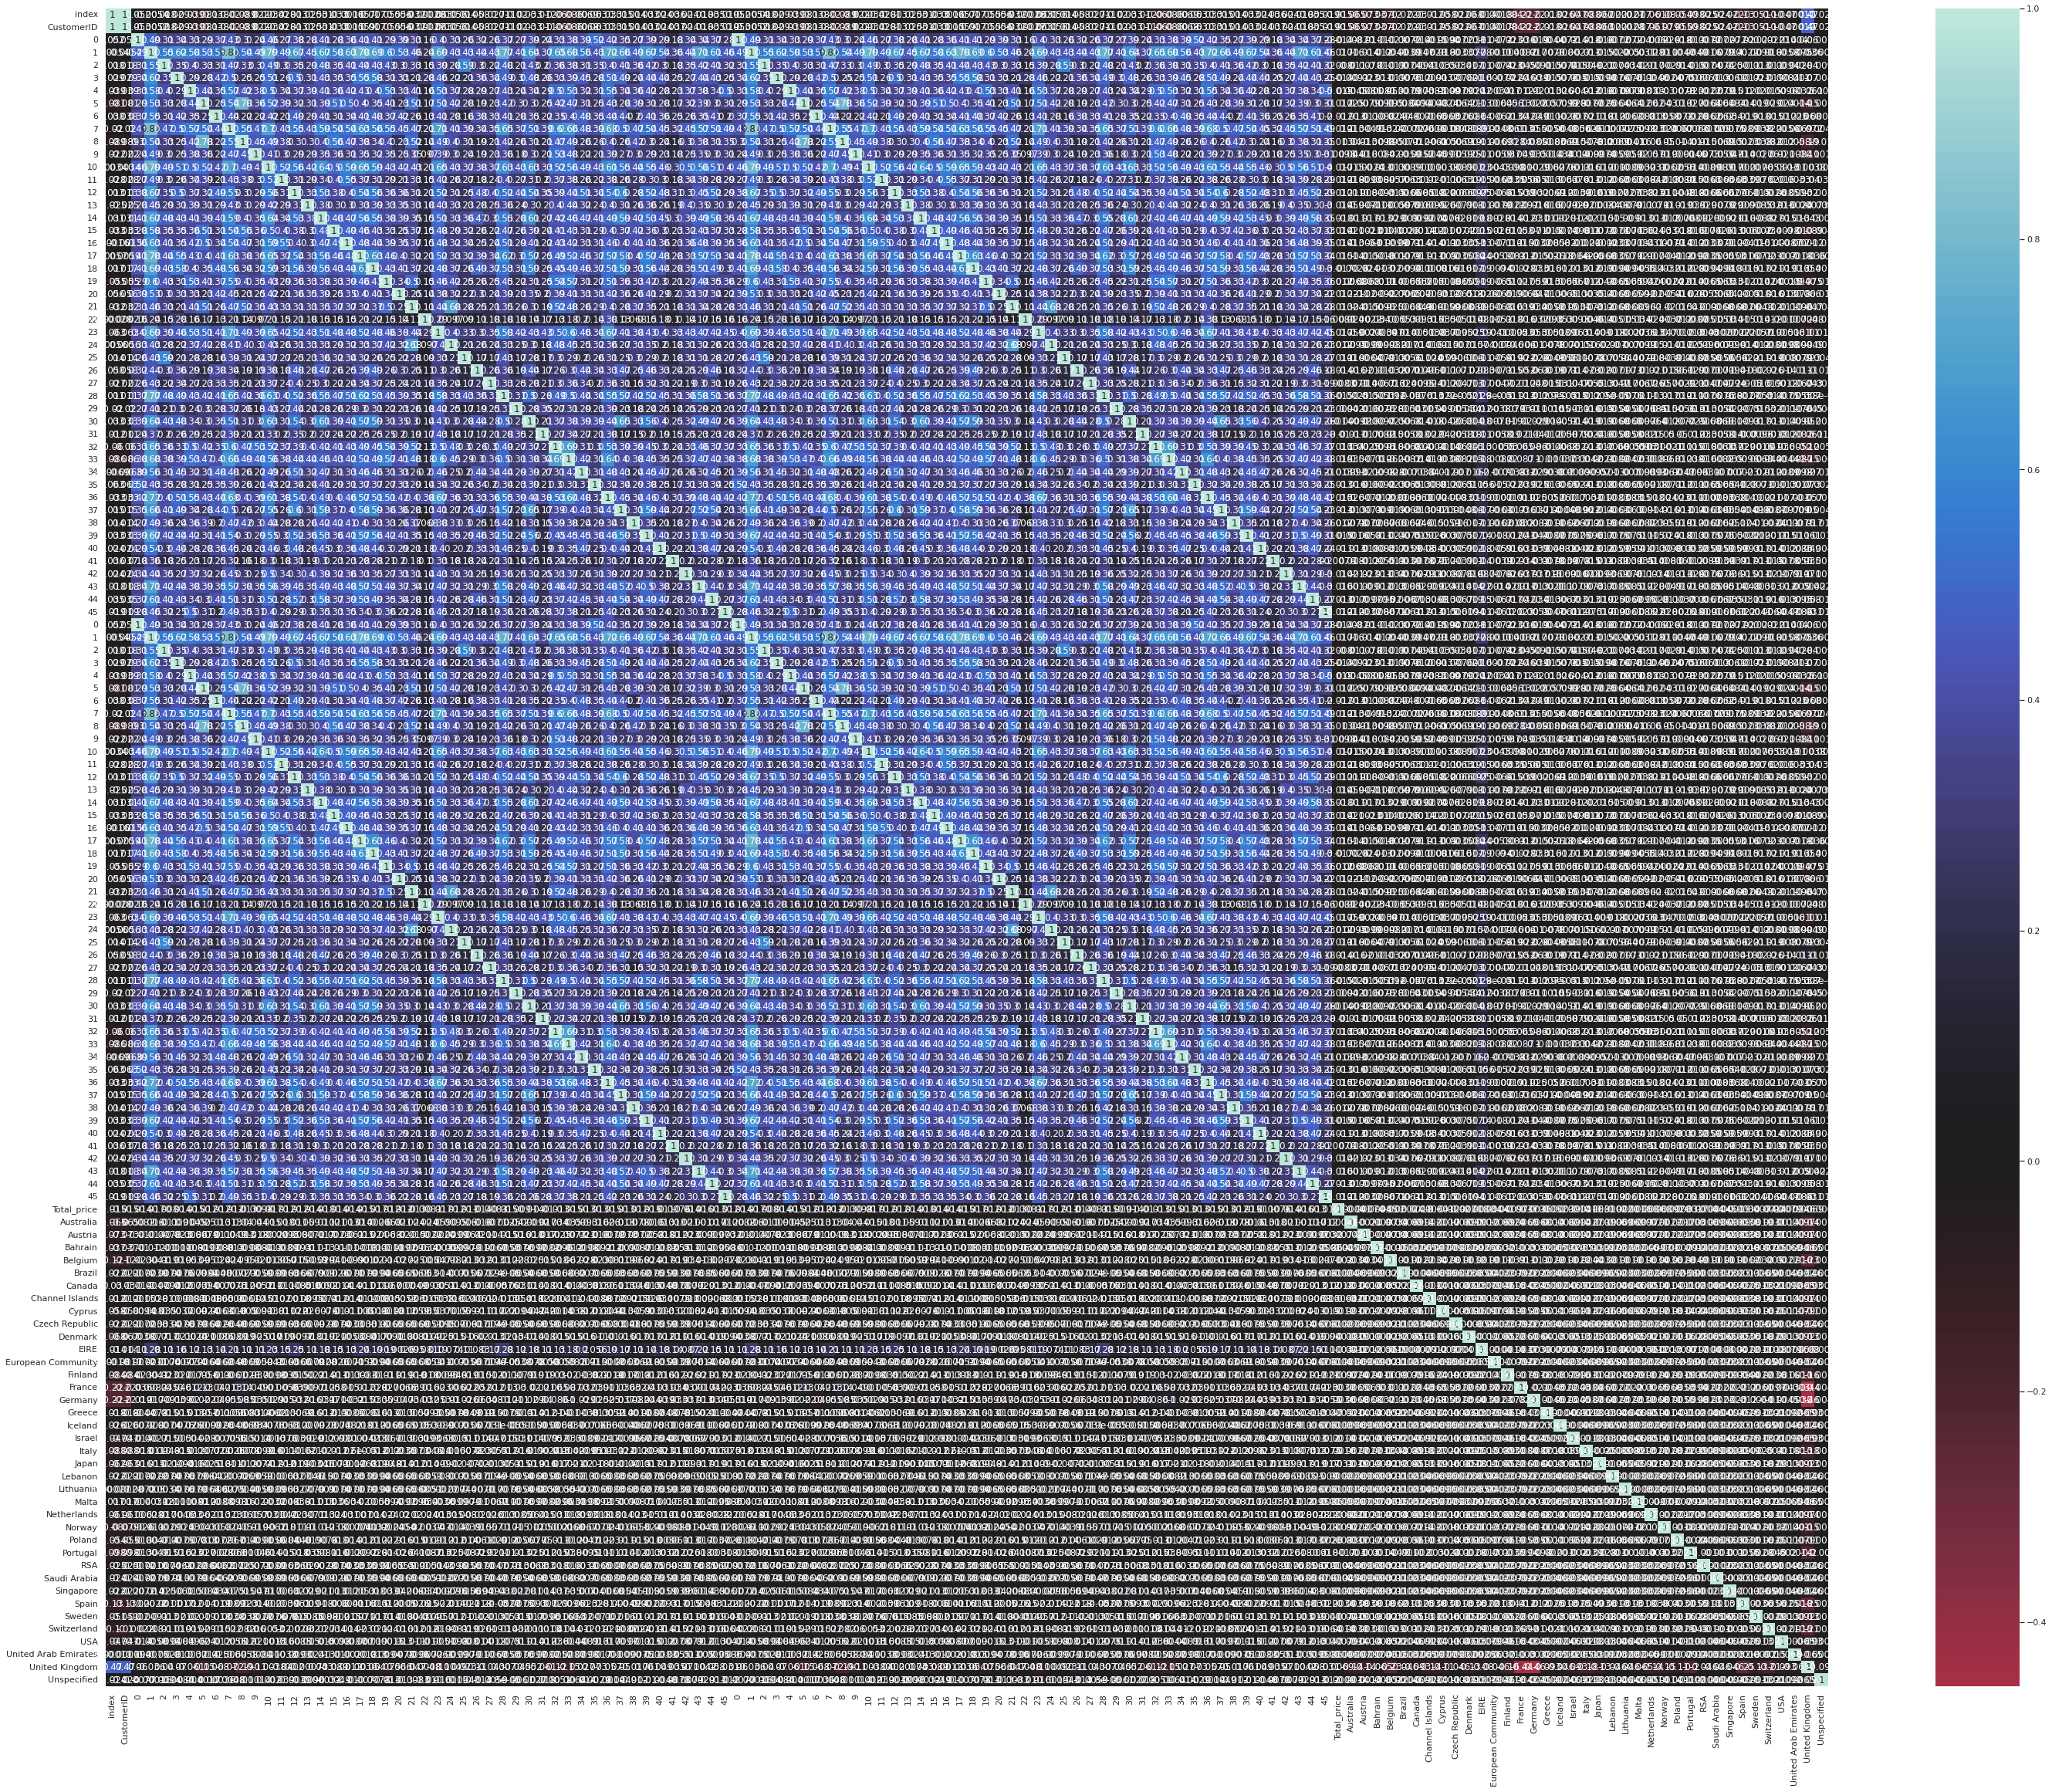

In [ ]:
#correlation matrix
corrmat= df_4.corr()
plt.figure(figsize=(50,40))  
sns.heatmap(corrmat,annot=True, cmap= "icefire_r" , center=0)

In [ ]:
#scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


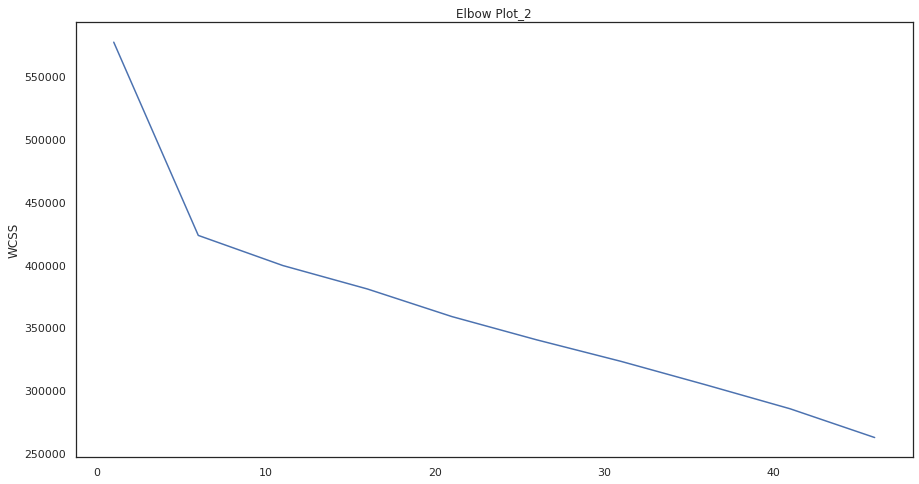

In [ ]:
#plot-1

from sklearn.cluster import KMeans
wcss = []
for i in range(1,50,5):
    kmeans = KMeans(n_clusters = i, init = "k-means++", max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
    
plt.figure(figsize = (15,8), facecolor = None)
plt.plot(range(1,50, 5), wcss)
plt.title("Elbow Plot_2")
plt.ylabel("WCSS")
plt.savefig("cluster_2(1).png")

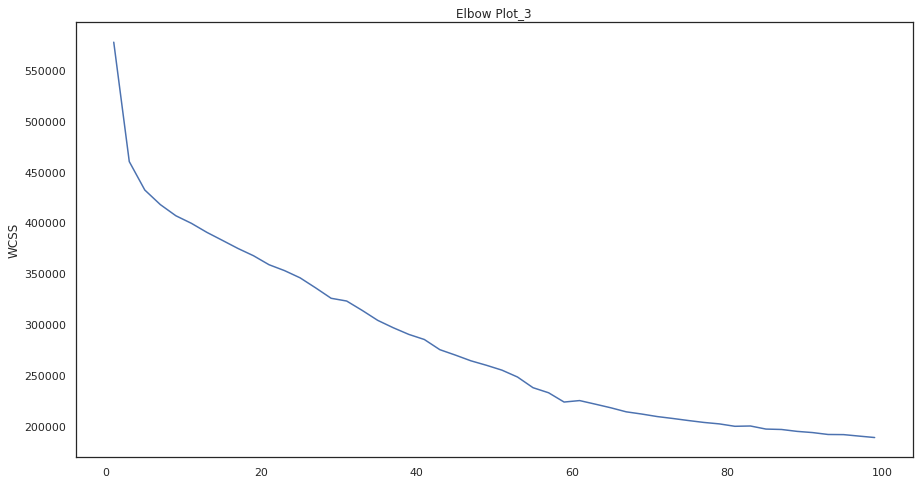

In [ ]:
#plot-2

from sklearn.cluster import KMeans
wcss = []
for i in range(1,100,2):
    kmeans = KMeans(n_clusters = i, init = "k-means++", max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
    
plt.figure(figsize = (15,8), facecolor = None)
plt.plot(range(1,100,2), wcss)
plt.title("Elbow Plot_3")
plt.ylabel("WCSS")
plt.savefig("cluster_2(2).png")

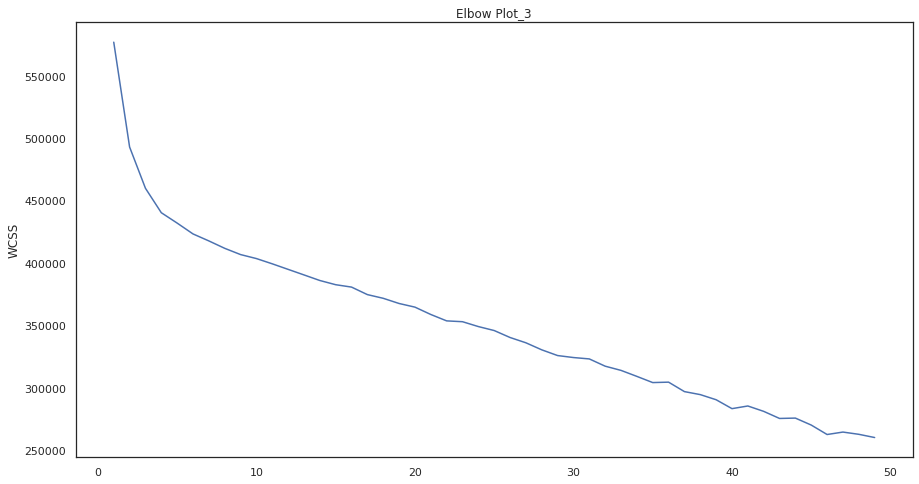

In [ ]:
#plot-3

from sklearn.cluster import KMeans
wcss = []
for i in range(1,50):
    kmeans = KMeans(n_clusters = i, init = "k-means++", max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
    
plt.figure(figsize = (15,8), facecolor = None)
plt.plot(range(1,50), wcss)
plt.title("Elbow Plot_3")
plt.ylabel("WCSS")
plt.savefig("cluster_2(3).png")

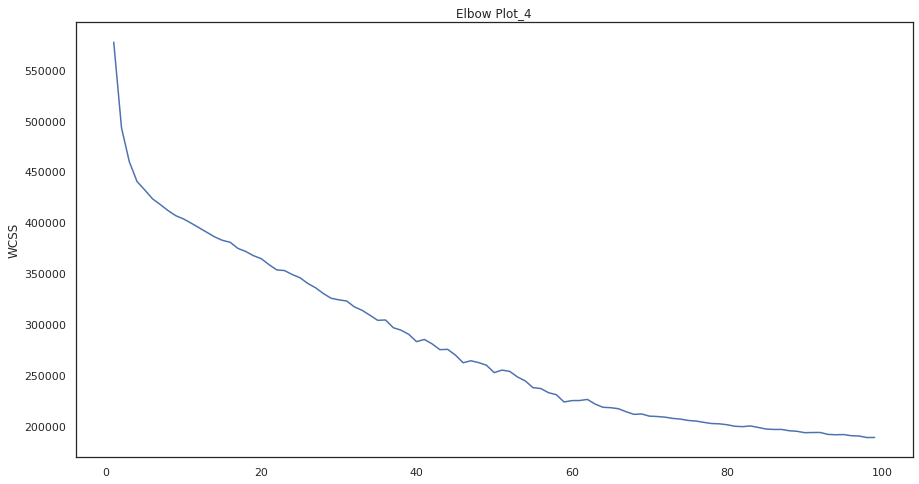

In [ ]:
#plot-4

from sklearn.cluster import KMeans
wcss = []
for i in range(1,100):
    kmeans = KMeans(n_clusters = i, init = "k-means++", max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
    
plt.figure(figsize = (15,8), facecolor = None)
plt.plot(range(1,100), wcss)
plt.title("Elbow Plot_4")
plt.ylabel("WCSS")
plt.savefig("cluster_2(4).png")

#Accounted clustering taken into consideration

In [ ]:
kmeans = KMeans(n_clusters = 5, init = 'k-means++')
y_kmeans = kmeans.fit_predict(X)

In [ ]:
print(y_kmeans)

[0 4 0 ... 0 1 0]


# **Visualising the clusters**

Doing for 5 clusters in df_4 DataFrame

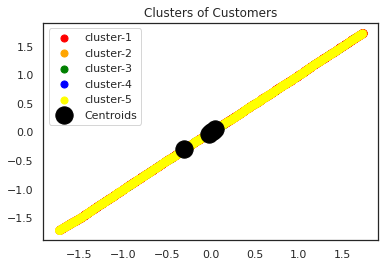

In [ ]:
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 50, c = 'red', label = 'cluster-1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 50, c = 'orange', label = 'cluster-2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 50, c = 'green', label = 'cluster-3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 50, c = 'blue', label = 'cluster-4')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 50, c = 'yellow', label = 'cluster-5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'black', label = 'Centroids')
plt.title('Clusters of Customers')
# plt.xlabel('Annual Income(k$)')
# plt.ylabel('Spending_Score')
plt.legend()
plt.show()

# **Second dataset**: df_merge

**Elbow plot on df_merge:**
Using df_merge as the dataframe.

In [ ]:
df_merge.sample()

CustomerID Invoice_day  0  1  2  3  4  5  6  7  ...  36  37  38  39  \
276169       15506  2011-07-24  0  0  0  0  0  0  0  0  ...   0   0   0   0   

        40  41  42  43  44  45  
276169   0   0   0   0   0   0  

[1 rows x 94 columns]

In [ ]:
df_merge.drop("Invoice_day", axis = 1, inplace = True)
X1 = df_merge

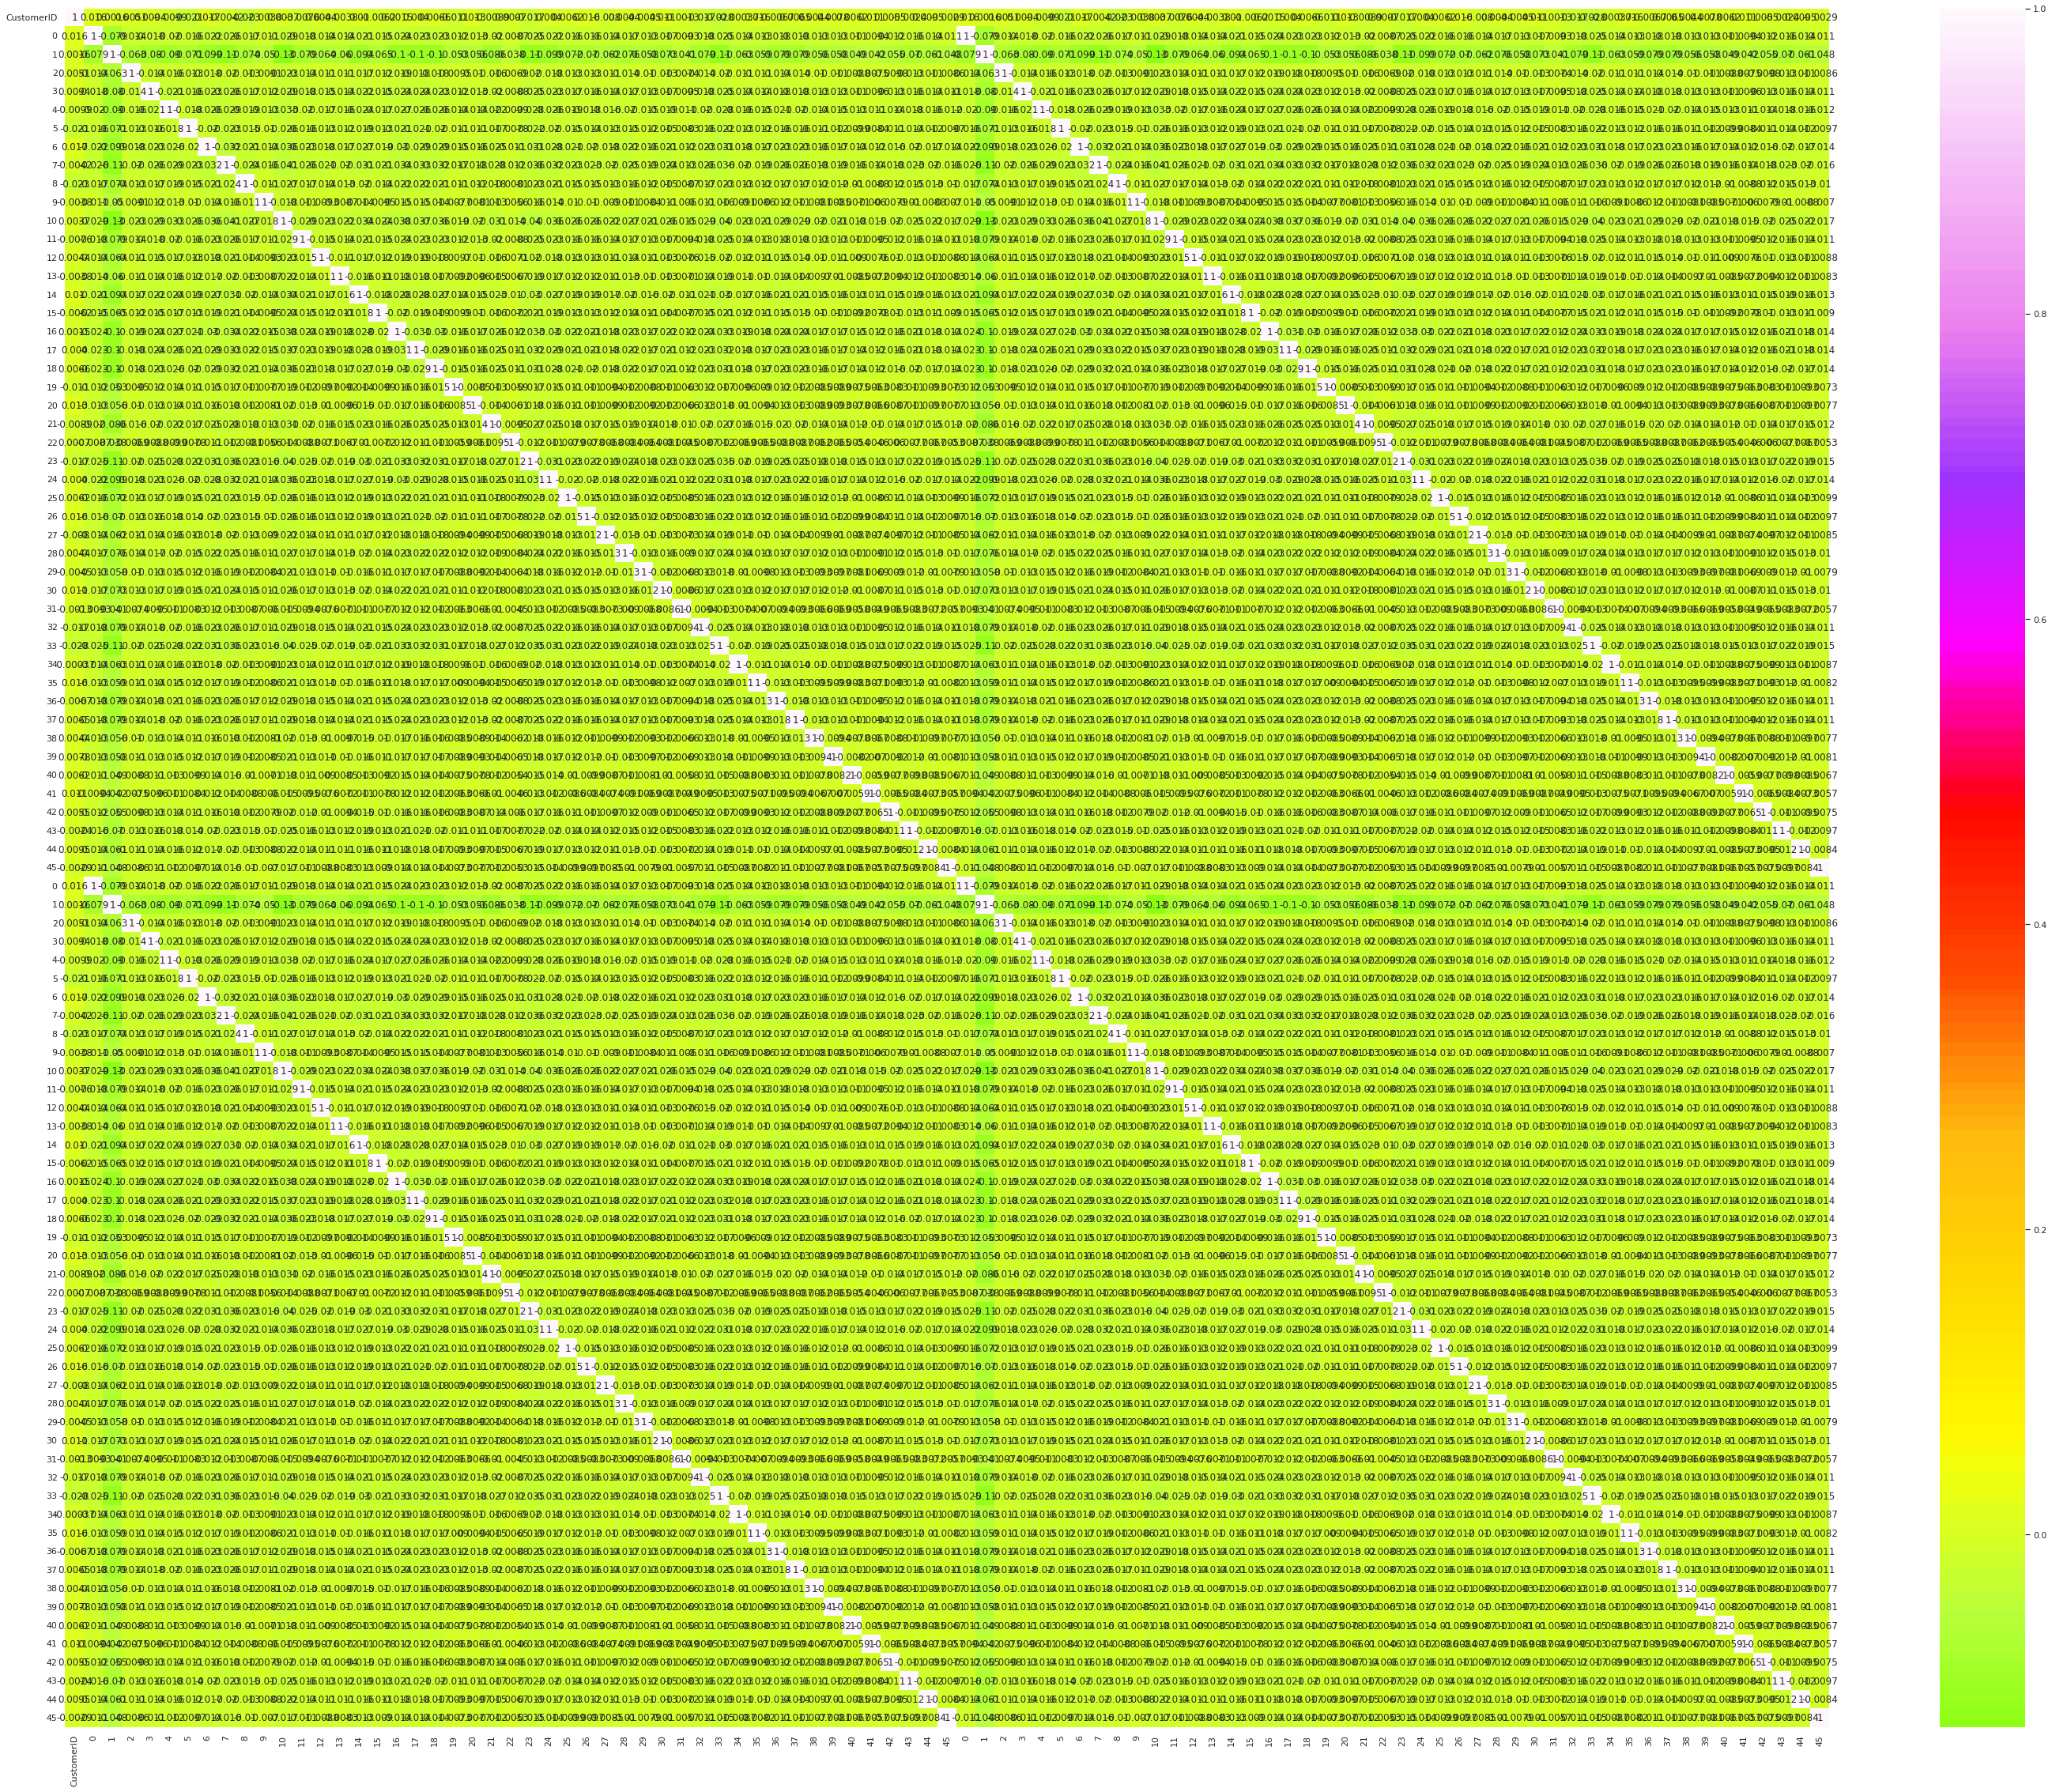

In [ ]:
#correlation matrix
corrmat= X1.corr()
plt.figure(figsize=(50,40))  
sns.heatmap(corrmat,annot=True, cmap= "gist_ncar" , center=0)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklea

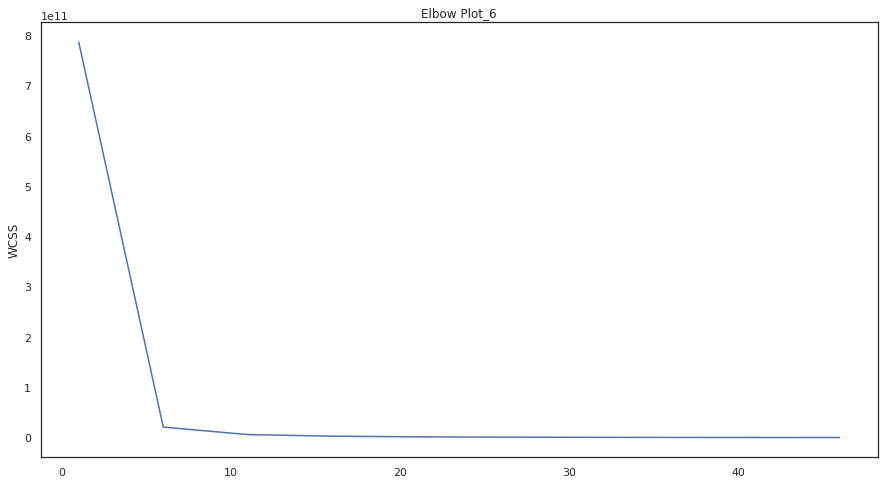

In [ ]:
#plot-6

from sklearn.cluster import KMeans
wcss = []
for i in range(1,50, 5):
    kmeans = KMeans(n_clusters = i, init = "k-means++", max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(X1)
    wcss.append(kmeans.inertia_)
    
plt.figure(figsize = (15,8), facecolor = None)
plt.plot(range(1,50, 5), wcss)
plt.title("Elbow Plot_6")
plt.ylabel("WCSS")
plt.savefig("cluster_2(6).png")

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklea

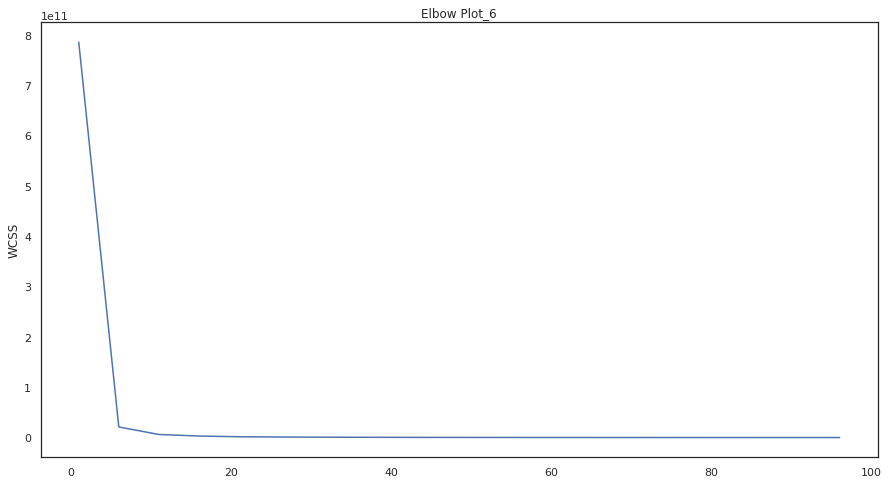

In [ ]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1,100, 5):
    kmeans = KMeans(n_clusters = i, init = "k-means++", max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(X1)
    wcss.append(kmeans.inertia_)
    
plt.figure(figsize = (15,8), facecolor = None)
plt.plot(range(1,100, 5), wcss)
plt.title("Elbow Plot_6")
plt.ylabel("WCSS")
plt.savefig("cluster_2(6).png")

## Accounted clustering taken into consideration

On doing elbow plot on df_merge,  I got the  optimum cluster value at 7. So we do it with KMeans(n_clusters = 7)

In [ ]:
#Applying k-means on df_merge
kmeans = KMeans(n_clusters = 7, init = 'k-means++')
y_kmeans1 = kmeans.fit_predict(X1)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


In [ ]:
print(y_kmeans1)

[3 3 3 ... 5 5 5]


# **Conclusion**

**Minimum Requirements:**

The end objective of the participant is to come up with customer segmentations that take into account all the information that is presented in the dataset. The participant is expected to use NLP techniques to find similarity between the products. 


So this is what I have done

1. I took the dataset "E-Comm.data.csv" and did the data cleaning and preprocessing.

2. Took the Description column which contained the text speech data. Used NLP techniques and did the first clustering to find similar customers.

3. Made a new dataframe of the NLP clustering results and merged it with the original dataset.

4. Did the second clustering on two dataframes; df_4 and df_merge. df_4 was with the rest of the features like Countries and the clusters. df_merge was with only customer ID and clusters.